## Drug Classification (DTSA 5509 - Supervised Learning Final Project)

I have selected the drug200 dataset (https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data) for analysis. I have started with a concise exploratory data analysis (EDA), proceeded with feature selection, and attempted to classify drugs for suitable patients. Throughout this project, I have compared various methods such as Random forest, Logistic Regression

In [155]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [219]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

In [220]:
# Download datset from https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data
# Extract the zip and keep drug200.csv file in same path as juypter notebook file

df = pd.read_csv("drug200.csv")
df.replace('DrugY', 'drugY', inplace=True) # to make all standard style

print("Dataframe Info >>>")
df.info()

print(f"Data Columns >>> {df.columns}")

Dataframe Info >>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
Data Columns >>> Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [221]:
print("Dataframe Head >>>")
df.head()

Dataframe Head >>>


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [222]:
# Unique list of Drugs
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### EDA

#### Histogram Plot by Drug & Sex

We notice that drugY majorly used by Female, and drugC, drugA, drugB is majorly used by Male

<AxesSubplot:xlabel='Drug', ylabel='Count'>

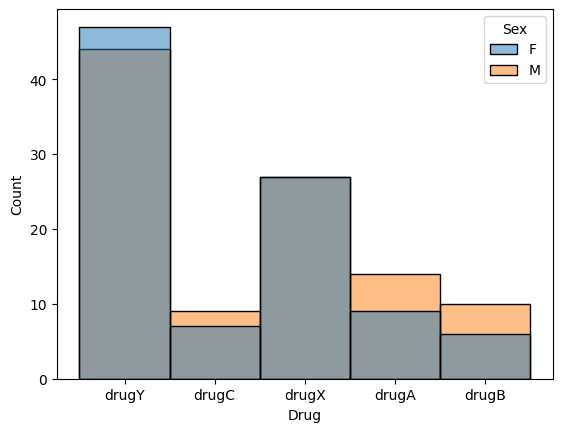

In [223]:
sns.histplot(data=df, x='Drug', hue='Sex')

#### Histogram Plot by Drug & BP
We notice that drugA and drugB are exclusively prescribed for patients with high blood pressure (BP), while drugC is specifically administered to patients with low blood pressure. On the other hand, drugX appears to be distributed evenly among patients with both low and normal blood pressure.

<AxesSubplot:xlabel='Drug', ylabel='Count'>

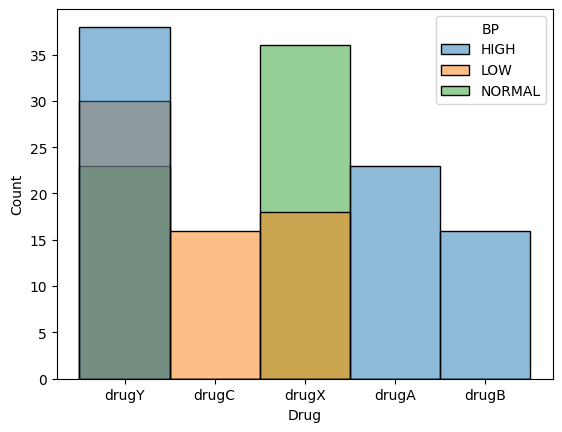

In [224]:
sns.histplot(data=df, x='Drug', hue='BP')

#### Histogram Plot by Drug & cholesterol
drugC was exclusively administered to patients with high cholesterol levels, whereas drugX was more frequently prescribed to patients with normal cholesterol levels.

<AxesSubplot:xlabel='Drug', ylabel='Count'>

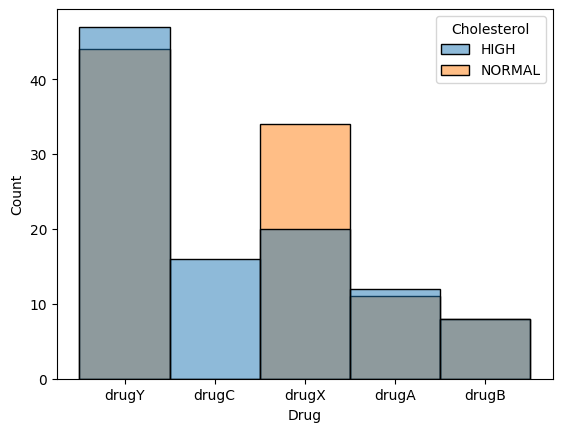

In [225]:
sns.histplot(data=df, x='Drug', hue='Cholesterol')

### Numerical variables
A comparative visualization of two key variables, 'Age' and 'Na_to_K', from the dataset Data. Utilizing Seaborn's boxplot() function, it constructs side-by-side box plots within a single figure, facilitating an insightful examination of their distributions. The figure is tailored with dimensions of 15 by 6 inches, enhancing clarity and detail. Through this visualization, we aim to gain a deeper understanding of the distributional characteristics of these variables, aiding in potential insights or further analysis.

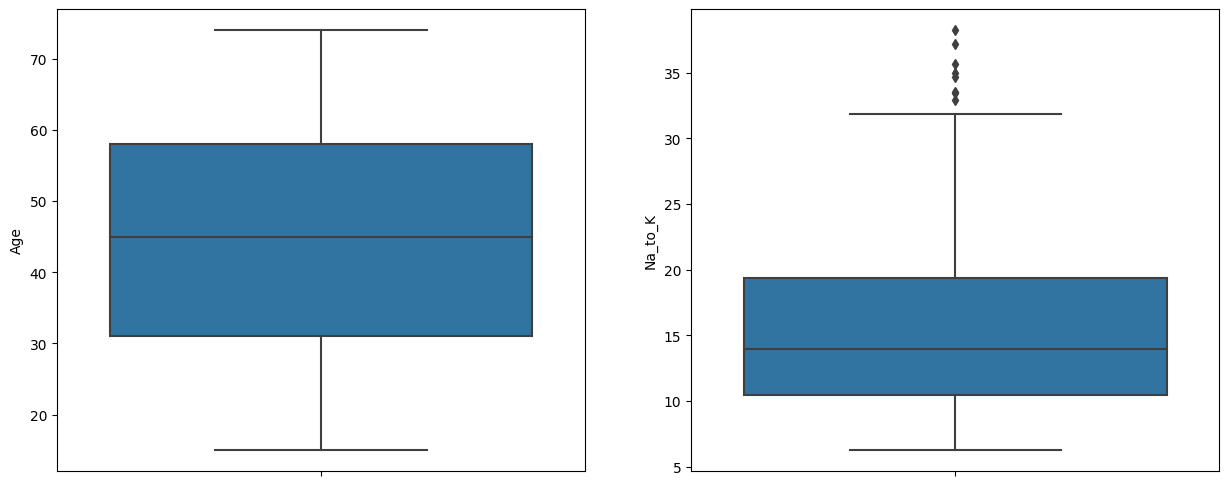

In [226]:
plt.subplots(figsize=(15, 6))
plt.subplot(121)
sns.boxplot(data=df, y='Age')

plt.subplot(122)
sns.boxplot(data=df, y='Na_to_K')
plt.show()

### Boxplot for Age & Drug
It is evident that drugB is prescribed to a patient group with a notably higher average age compared to other groups.

<AxesSubplot:xlabel='Drug', ylabel='Age'>

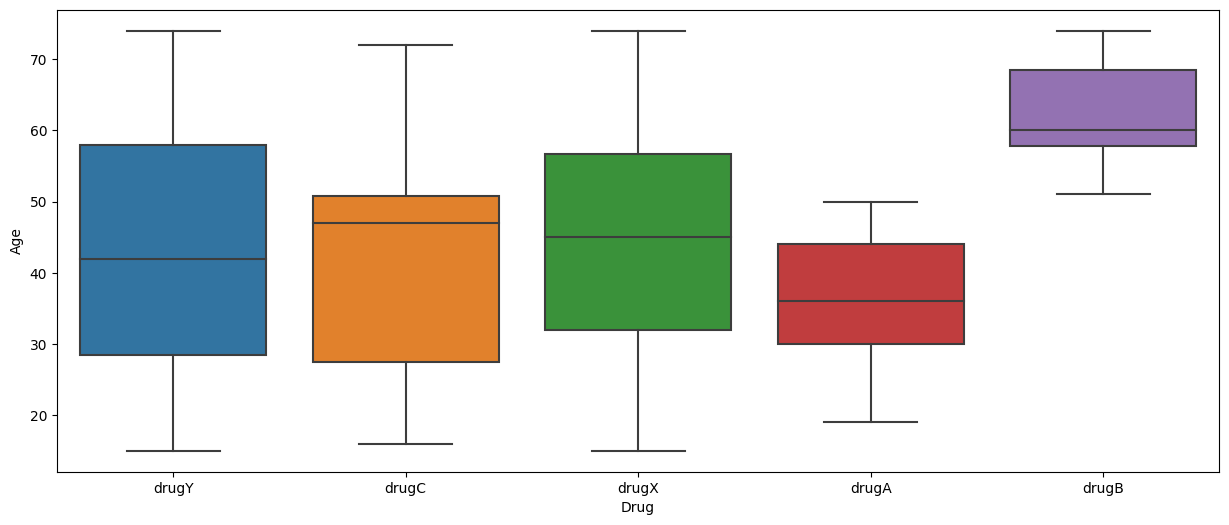

In [227]:
plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, y='Age', x='Drug')

In [228]:
# correlation matrix 
df[['Age', 'Na_to_K']].corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


### Feature selection

Involves identifying and choosing the most relevant features from the dataset that contribute significantly to predicting the target variable. By selecting informative features, the aim is to improve model performance, reduce computational complexity, and mitigate the risk of overfitting.

The mutual information score for 'Sex' is approximately 0, indicating a weak relationship between this variable and the target.

In [229]:
feature_columns = df.drop(columns='Drug').columns.tolist()
categorical_variables = df.select_dtypes(include='object').drop('Drug', axis=1)

feature_importance = categorical_variables.apply(lambda categorical_series: mutual_info_score(categorical_series, df['Drug'])).sort_values(ascending=False)

print(feature_importance)

BP             0.429839
Cholesterol    0.064536
Sex            0.005340
dtype: float64


### Classification


During classification scoring, I will annotate target labels as categorical, to achive it I use LabelEncoder from scikit-learn to convert them into numerical values

In [230]:
X = df.drop(columns='Drug')
X.Sex = df.Sex.map({'M': 0, 'F': 1})
X.Cholesterol = df.Cholesterol.map({'NORMAL': 0, 'HIGH': 1})
X.BP = df.BP.map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

X_num = X.copy()

X_categ = df.drop(columns=['Drug', 'Age', 'Na_to_K'])
y = df.Drug
y_num = y.copy().map({'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, test_size=0.2, random_state=32)

In [231]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
2,47,0,0,1,10.114
59,34,0,2,1,18.703
87,69,0,0,1,15.478
100,31,0,2,0,11.871
16,69,0,0,0,11.455


In [232]:
pca = PCA(n_components=2)
pca.fit(X_num)
X_pca = pca.fit_transform(X_test_num)

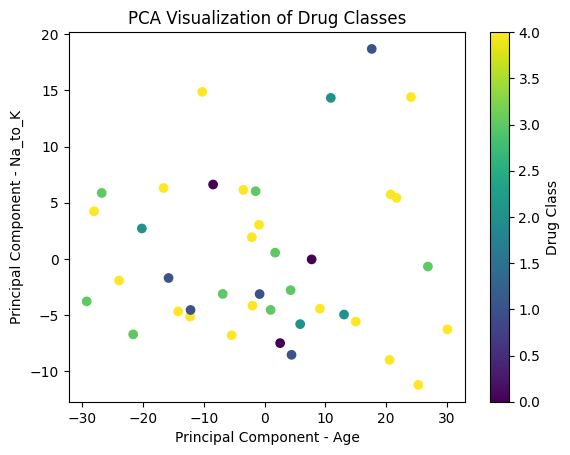

In [233]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_encoded, cmap='viridis')
plt.xlabel('Principal Component - Age')
plt.ylabel('Principal Component - Na_to_K')
plt.title('PCA Visualization of Drug Classes')
plt.colorbar(label='Drug Class')
plt.show()

### KNN - Random forest

I am aiming to optimize the hyperparameters of a RandomForestClassifier using ***RandomizedSearchCV***. By defining a grid of potential parameter values and conducting a randomized search with cross-validation, it seeks to find the combination of hyperparameters that yields the best performance. Limiting parallelism to 1 worker is intended to prevent potential errors related to memory usage or segmentation faults during the optimization process

Execution of below is **time consuming** as `n_jobs=1` reduces parallelism and prevent the error from occurring due to excessive memory usage or segmentation faults in parallel workers. If the error persists, further investigation into system resources and debugging may be necessary.


In [218]:
forest_grid_parameters = {
    'n_estimators': [10*(i+1) for i in range(100)],
    'criterion': ['gini', 'entropy', 'log-loss'],
    'max_depth': [i for i in range(50)],
    'min_samples_split': [i for i in range(4)],
    'min_samples_leaf': [i for i in range(10)],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [i for i in range(50)],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=forest_grid_parameters,
    cv=10,
    n_iter=150,
    n_jobs=1
)

random_search.fit(X_num, y_num)

print(random_search.best_params_)

{'n_estimators': 810, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 15, 'max_features': 'sqrt', 'max_depth': 44, 'criterion': 'gini', 'class_weight': None}


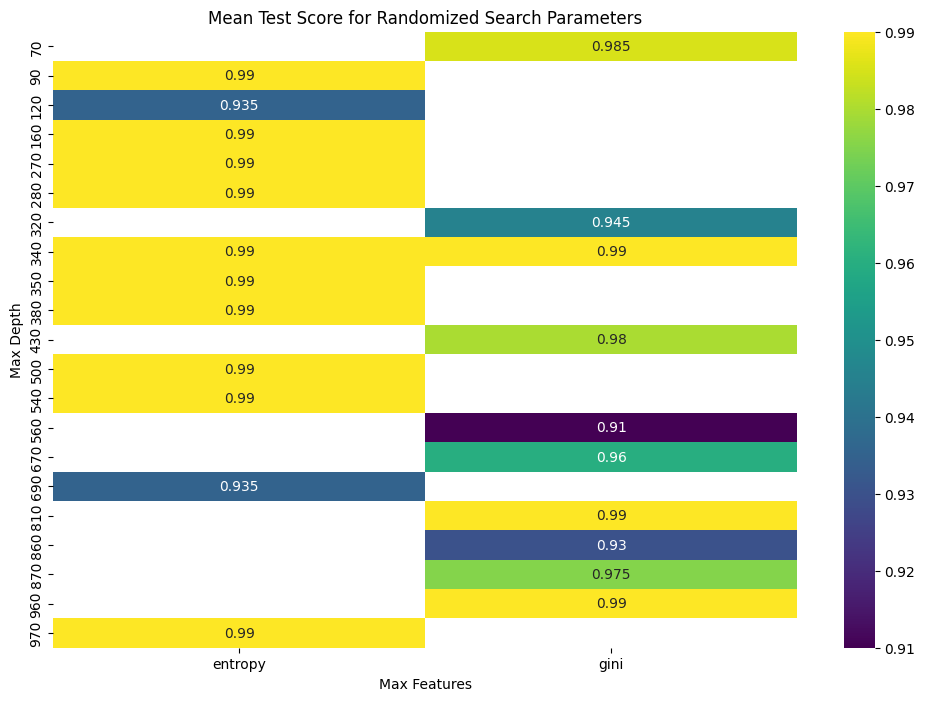

In [234]:
cv_results = random_search.cv_results_

cv_results_df = pd.DataFrame(cv_results)

# relevant columns for heatmap
heatmap_columns = ['param_' + param for param in forest_grid_parameters.keys() if param != 'class_weight']
heatmap_columns += ['mean_test_score']

# Creating a subset of cv_results_df for heatmap
heatmap_df = cv_results_df[heatmap_columns]
grouped_df = heatmap_df.groupby(heatmap_columns[:-1]).mean().reset_index()
heatmap_pivot = grouped_df.pivot_table(index=heatmap_columns[0], columns=heatmap_columns[1], values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, cmap='viridis', fmt='.4g')
plt.title('Mean Test Score for Randomized Search Parameters')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.show()

### KNN - Logistic Regression

K-Nearest Neighbors (KNN) is a classification algorithm that predicts the class of a data point based on the majority class of its nearest neighbors in the feature space. In contrast, Logistic Regression is a linear model used for binary classification, estimating the probability of an outcome by fitting a logistic function to the input features.

In [235]:
Logistic_model = LogisticRegression(max_iter=2000)

In [236]:
Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [237]:
Logistic_model.score(X_train, y_train)

0.99375

In [238]:
Logistic_model.score(X_test, y_test)

1.0

In [239]:
features = X_test.columns
importances = Logistic_model.coef_[0]

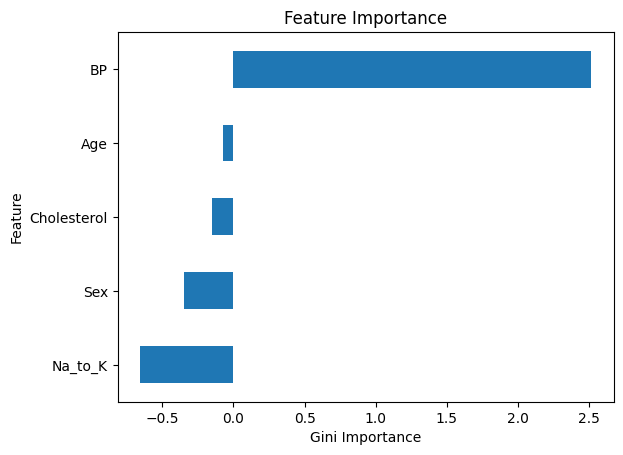

In [240]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()